In [13]:
!pip install optuna




In [14]:
!pip install numpy pandas seaborn matplotlib scikit-learn

## Import Library

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 20

## EDA

In [17]:
df = pd.read_csv("train.csv")

In [91]:
test_df = pd.read_csv("test.csv")
df= test_df.copy()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [93]:
df.describe(include='all')

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.00000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000
mean,102023.500000,1.109092,16.067102,1.648161,9026.304556,0.918313,3.635007,132.328001,1.20009,19.913275,23.535462,8.505959,8.791500,125.419794,0.569513,0.004136,0.067808,0.895162,0.312926,0.243688,22.206971,0.005783,0.182055,5.903376,7.392417,4.217655,10.088485,0.057810,0.129283,5.944131,7.274092,4.039697,9.709128,0.063809,11.520611,1.228719,-0.086477
std,14726.040303,0.438084,16.654196,1.235666,1751.328311,0.273889,8.577250,10.885679,3.26473,15.383823,14.877455,17.192913,16.732349,12.598137,0.495149,0.064181,0.251418,0.306348,0.463689,0.429311,6.760468,0.075826,1.145390,1.639316,3.458179,2.666393,5.215587,0.403434,0.877250,1.599746,3.433149,2.749871,5.496810,0.467176,2.651113,1.402773,2.251650
min,76518.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.00000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,89270.750000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.00000,1.000000,5.000000,4.000000,5.000000,118.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,102023.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.00000,19.000000,19.000000,7.000000,7.000000,124.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,6.000000,7.000000,5.000000,12.200000,0.000000,0.000000,6.000000,8.000000,5.000000,12.166667,0.000000,11.100000,1.400000,0.320000
75%,114776.250000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,139.000000,1.00000,37.000000,37.000000,9.000000,9.000000,132.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,23.000000,0.000000,0.000000,6.000000,9.000000,6.000000,13.333333,0.000000,0.000000,6.000000,9.000000,6.000000,13.250000,0.000000,12.700000,2.600000,1.790000
max,127529.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.00000,44.000000,43.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,23.000000,45.000000,23.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,17.714286,10.000000,16.200000,3.700000,3.510000


In [20]:
df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [21]:
df['Target'].value_counts()


Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

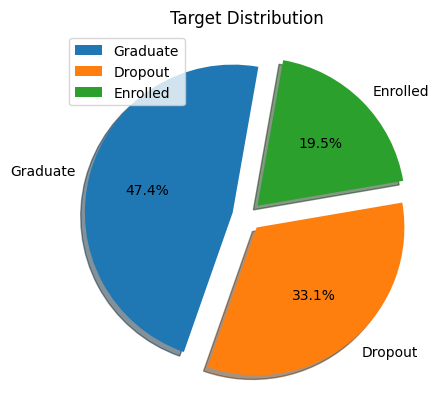

In [22]:
x=plt.pie(df['Target'].value_counts(),labels =df['Target'].unique(),startangle =80 ,explode = [0.1,0.1,0.1],autopct="%1.1f%%",shadow = True )
plt.title("Target Distribution")
plt.legend()

plt.show()

#### looking for duplicate values

In [94]:
df[df.duplicated]

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


#### looking for null values

In [95]:
df.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
                                                 ..
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Length: 37, dtype: int64

In [96]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
                                                 ..
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Length: 37, dtype: int64

####Uni variate analysis

In [97]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [27]:
def five_point_summary(df):
  columns = df.columns
  for i in columns:
    # draw a hist
    fig , axes = plt.subplots(nrows =1 ,ncols =2 , figsize = (12,6))

    axes[0].hist(df[i],facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
    axes[0].set_title(f"{i} Distribution")
    axes[0].set_xlabel("Range")
    axes[0].set_ylabel("Frequency")

    axes[1].boxplot(df[i])
    axes[1].set_title(f"{i} Summary")
    axes[1].set_xlabel("Range")
    axes[1].set_ylabel("Frequency")



    plt.show()


In [28]:
int_df = df.select_dtypes("int")

In [29]:
int_df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
0,0,1,1,1,9238,1,1,1,1,19,5,5,0,0,0,1,0,1,18,0,0,6,6,6,0,0,6,7,6,0
1,1,1,17,1,9238,1,1,1,19,19,9,9,1,0,0,1,0,0,18,0,0,6,8,4,0,0,6,9,0,0
2,2,1,17,2,9254,1,1,1,3,19,2,3,0,0,0,1,1,0,18,0,0,6,0,0,0,0,6,0,0,0
3,3,1,1,3,9500,1,1,1,19,3,3,2,1,0,0,1,0,1,18,0,0,7,9,7,0,0,8,11,7,0
4,4,1,1,2,9500,1,1,1,19,37,4,9,1,0,0,1,0,0,18,0,0,7,12,6,0,0,7,12,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,1,19,1,7,5,1,0,0,1,0,1,18,0,0,6,9,6,0,0,6,8,5,0
76514,76514,1,1,6,9254,1,1,1,1,38,4,9,1,0,0,1,0,0,19,0,0,6,22,4,0,0,6,9,6,0
76515,76515,5,17,1,9085,1,1,1,37,37,9,10,1,0,0,1,0,0,19,0,0,5,13,4,2,0,5,8,5,1
76516,76516,1,1,3,9070,1,1,1,38,37,5,9,1,0,0,1,0,0,18,0,0,6,0,0,0,0,6,0,0,0


In [30]:
int_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.0,19129.25,38258.5,57387.75,76517.0
Marital status,76518.0,1.111934,0.441669,1.0,1.00,1.0,1.00,6.0
Application mode,76518.0,16.054419,16.682337,1.0,1.00,17.0,39.00,53.0
Application order,76518.0,1.644410,1.229645,0.0,1.00,1.0,2.00,9.0
Course,76518.0,9001.286377,1803.438531,33.0,9119.00,9254.0,9670.00,9991.0
...,...,...,...,...,...,...,...,...
Curricular units 2nd sem (credited),76518.0,0.137053,0.933830,0.0,0.00,0.0,0.00,19.0
Curricular units 2nd sem (enrolled),76518.0,5.933414,1.627182,0.0,5.00,6.0,6.00,23.0
Curricular units 2nd sem (evaluations),76518.0,7.234468,3.503040,0.0,6.00,7.0,9.00,33.0
Curricular units 2nd sem (approved),76518.0,4.007201,2.772956,0.0,1.00,5.0,6.00,20.0


In [31]:
int_df.drop(["id"],axis =1 )

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
0,1,1,1,9238,1,1,1,1,19,5,5,0,0,0,1,0,1,18,0,0,6,6,6,0,0,6,7,6,0
1,1,17,1,9238,1,1,1,19,19,9,9,1,0,0,1,0,0,18,0,0,6,8,4,0,0,6,9,0,0
2,1,17,2,9254,1,1,1,3,19,2,3,0,0,0,1,1,0,18,0,0,6,0,0,0,0,6,0,0,0
3,1,1,3,9500,1,1,1,19,3,3,2,1,0,0,1,0,1,18,0,0,7,9,7,0,0,8,11,7,0
4,1,1,2,9500,1,1,1,19,37,4,9,1,0,0,1,0,0,18,0,0,7,12,6,0,0,7,12,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,1,19,1,7,5,1,0,0,1,0,1,18,0,0,6,9,6,0,0,6,8,5,0
76514,1,1,6,9254,1,1,1,1,38,4,9,1,0,0,1,0,0,19,0,0,6,22,4,0,0,6,9,6,0
76515,5,17,1,9085,1,1,1,37,37,9,10,1,0,0,1,0,0,19,0,0,5,13,4,2,0,5,8,5,1
76516,1,1,3,9070,1,1,1,38,37,5,9,1,0,0,1,0,0,18,0,0,6,0,0,0,0,6,0,0,0


- marital status : single , married , divorced , widowed
- Curricular units 1st sem (credited):

  The number of curricular units (courses) for which the student has received credit in the first semester.
- Curricular units 1st sem (enrolled):

  The number of curricular units (courses) in which the student enrolled during the first semester.
- Curricular units 1st sem (evaluations):

  The number of evaluations (e.g., exams, assignments) the student completed for the curricular units in the first semester.
- Curricular units 1st sem (approved):

  The number of curricular units the student passed or got approved in the first semester.
- Curricular units 1st sem (grade):

  The average grade or score the student received in the curricular units in the first semester.
- Curricular units 1st sem (without evaluations):

  The number of curricular units where the student did not have any evaluations (e.g., courses dropped or incomplete courses) in the first semester.

Assumptions :
- Marital status ( 3 categories )
- label encoding ( Application  mode ,Course)
- Mothers qualification , Father s Qualification bins of 0-19, 20-39,40 -
-


In [32]:
df.sample(n=10,random_state=43)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
75005,75005,1,1,3,9070,1,1,121.0,1,3,1,4,4,111.1,1,0,0,1,0,0,18,0,0,6,6,6,12.000000,0,0,6,6,6,11.333333,0,10.8,1.4,1.74,Graduate
104,104,1,1,1,171,1,1,140.0,1,37,38,9,9,137.9,1,0,0,1,0,0,19,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,9.4,-0.8,-3.12,Dropout
23357,23357,1,17,1,9119,1,1,123.0,1,37,3,7,2,113.4,0,0,0,1,1,0,18,0,0,5,5,5,10.600000,0,0,5,11,2,10.000000,0,10.8,1.4,1.74,Dropout
69832,69832,1,1,4,9085,1,1,133.1,1,3,1,2,5,110.0,1,0,0,1,0,0,21,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,11.1,0.6,2.02,Dropout
34710,34710,1,1,1,171,1,1,141.0,1,3,3,1,2,141.4,1,0,0,1,1,0,18,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,9.4,-0.8,-3.12,Graduate
16417,16417,1,39,1,9853,1,1,133.1,1,34,34,0,0,128.2,0,0,0,1,0,0,30,0,0,6,8,0,0.000000,0,0,6,11,0,0.000000,0,7.6,2.6,0.32,Dropout
66949,66949,1,39,2,9556,1,19,133.1,1,37,37,4,7,110.0,0,0,0,1,0,0,24,0,0,7,11,6,11.416667,0,0,8,12,7,11.962500,0,16.2,0.3,-0.92,Graduate
64152,64152,1,39,1,9991,0,1,150.0,1,37,37,9,9,120.5,0,0,0,0,1,0,36,0,0,5,5,0,0.000000,0,0,5,6,0,0.000000,0,16.2,0.3,-0.92,Dropout
67229,67229,1,43,1,9991,0,1,137.0,1,12,3,9,9,135.9,1,0,0,1,1,0,25,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,7.6,2.6,0.32,Dropout
35795,35795,1,1,2,9773,1,1,130.0,1,19,19,5,8,127.9,1,0,1,1,0,0,18,0,0,6,6,6,12.833333,0,0,6,6,6,12.833333,0,12.4,0.5,1.79,Graduate


In [33]:
#five_point_summary(df.drop(["id",'Target'],axis =1))

In [34]:
df['Marital status'].value_counts()

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

In [35]:
df['Course'].value_counts()

Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64

In [36]:
df["Application mode"].value_counts()                                           # Label encoding

Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
      ...  
26        1
4         1
35        1
9         1
3         1
Name: count, Length: 22, dtype: int64

In [37]:
df["Application order"].value_counts()                               # nth time the application is ordered

Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64

In [38]:
df["Previous qualification"].value_counts()                          # if there is heirarchy  , bins of size 10

Previous qualification
1     67183
19     2947
39     2928
3      1401
12      899
      ...  
14        3
37        3
11        2
17        2
36        1
Name: count, Length: 21, dtype: int64

In [39]:
df["Mother's occupation"].value_counts()

Mother's occupation
9      32386
4      16062
5       9452
3       4644
7       4207
       ...  
163        1
125        1
124        1
103        1
101        1
Name: count, Length: 40, dtype: int64

In [40]:
df["Father's occupation"].value_counts()

Father's occupation
9      22320
7      12910
5       9661
4       6668
3       5663
       ...  
125        1
12         1
39         1
161        1
13         1
Name: count, Length: 56, dtype: int64

In [41]:
df['Age at enrollment'].value_counts()                                             # bins size of 5

Age at enrollment
18    22377
19    18078
20    10367
21     4516
22     1907
      ...  
60       17
57       13
61       10
59        8
62        3
Name: count, Length: 46, dtype: int64

In [42]:
df.select_dtypes('object')

,Target
0,Graduate
1,Dropout
2,Dropout
3,Enrolled
4,Graduate
...,...
76513,Graduate
76514,Graduate
76515,Enrolled
76516,Dropout


## Bi variate Analysis

#### Nationality vs interantional

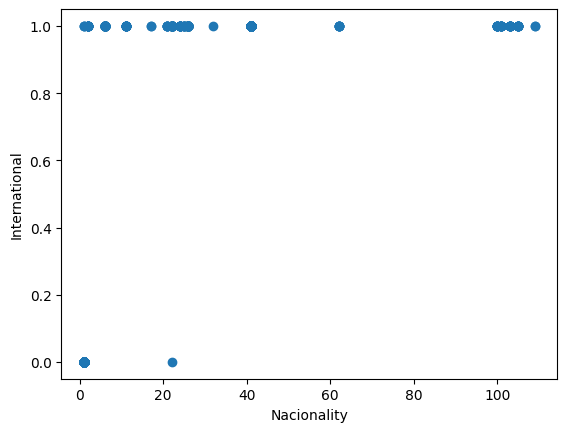

In [43]:
plt.scatter(x=df['Nacionality'],y =df["International"] )
plt.xlabel("Nacionality")
plt.ylabel("International")
plt.show()

In [44]:
df['Nacionality'].value_counts()

Nacionality
1      76013
41       221
26        67
6         56
22        56
24        15
11        15
2         13
103       12
105        9
101        9
100        9
21         6
25         6
62         6
17         2
109        2
32         1
Name: count, dtype: int64

In [45]:
df['International'].value_counts()

International
0    76011
1      507
Name: count, dtype: int64

Nacionality is 1 when International is 0

In [46]:
df['check'] = np.where((df['Nacionality']!=1)&(df['International']==0),1,0)

In [47]:
df[['Nacionality','International','check']][df[['Nacionality','International','check']].check==1]

,Nacionality,International,check
71572,22,0,1


In [48]:
df.drop('check',axis=1,inplace =True)

** **We can ignore the Nacionality column**  **

### Father's qualification vs Mother's qualification

In [49]:
df[["Father's qualification","Mother's qualification"]]

,Father's qualification,Mother's qualification
0,19,1
1,19,19
2,19,3
3,3,19
4,37,19
...,...,...
76513,1,19
76514,38,1
76515,37,37
76516,37,38


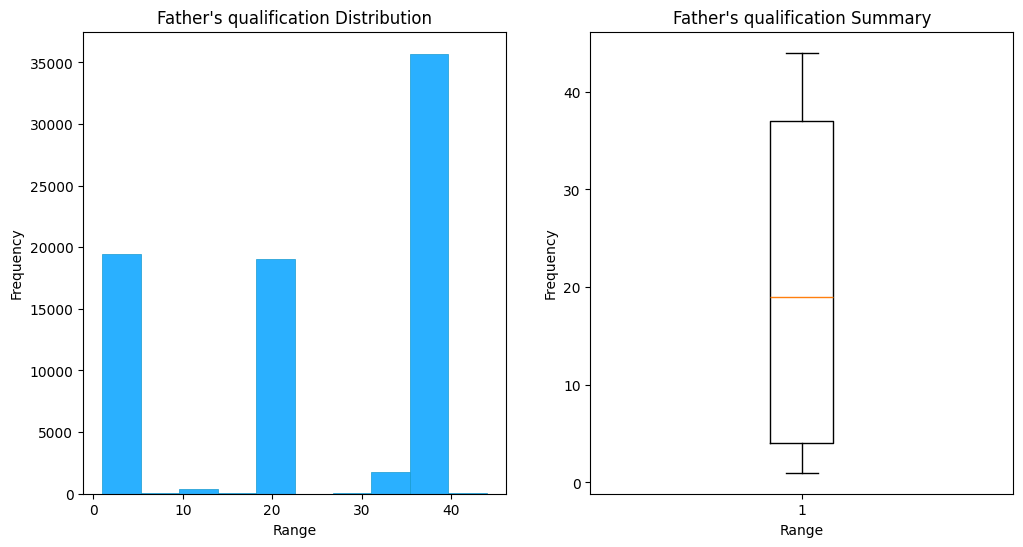

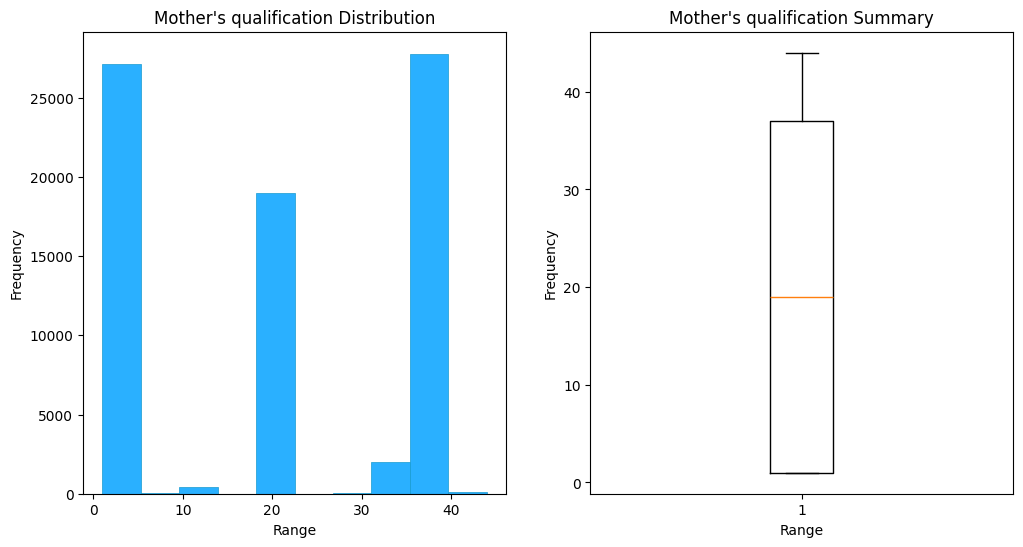

In [50]:
five_point_summary(df[["Father's qualification","Mother's qualification"]])

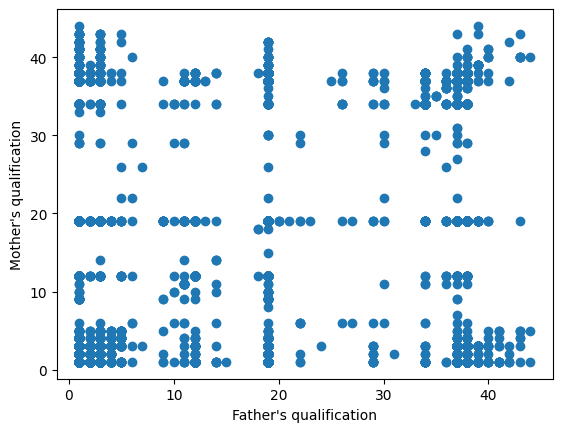

In [51]:
plt.scatter(x=df["Father's qualification"],y =df["Mother's qualification"] )
plt.xlabel("Father's qualification")
plt.ylabel("Mother's qualification")
plt.show()

In [98]:
df["Parent qualification"]= np.where((df["Mother's qualification"]>=df["Father's qualification"]),df["Mother's qualification"],df["Father's qualification"])

### Father's occupation vs Mother's occupation

In [53]:
df[["Father's occupation","Mother's occupation"]]

,Father's occupation,Mother's occupation
0,5,5
1,9,9
2,3,2
3,2,3
4,9,4
...,...,...
76513,5,7
76514,9,4
76515,10,9
76516,9,5


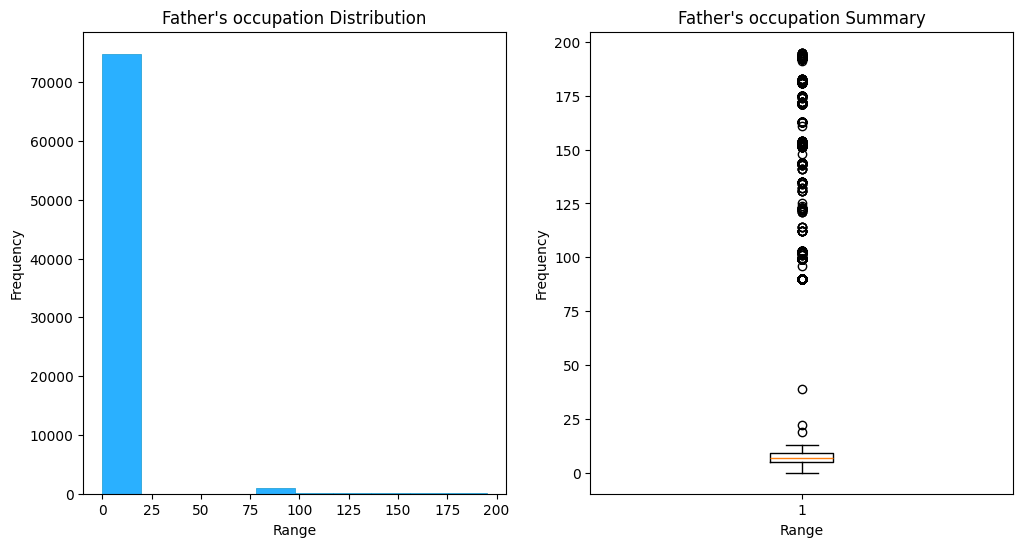

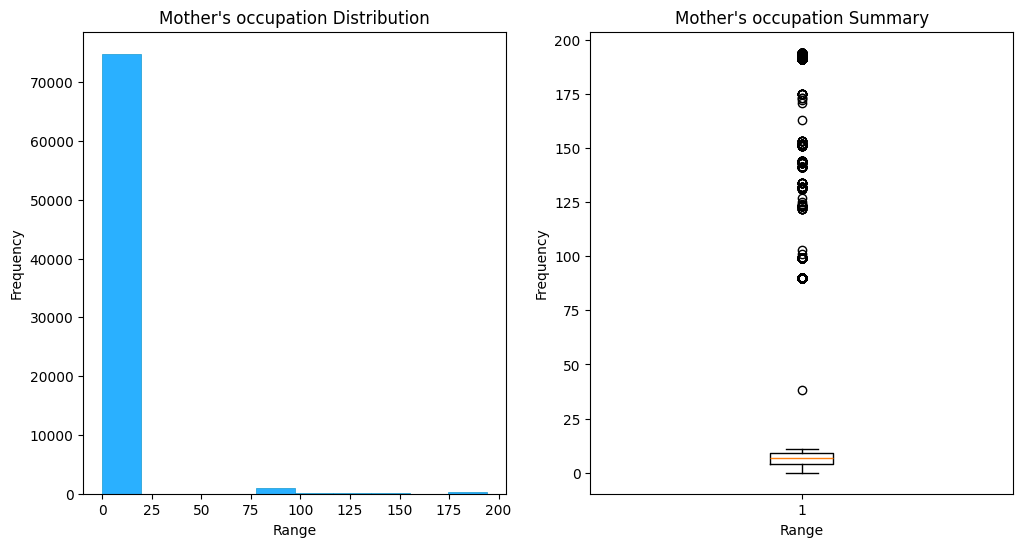

In [54]:
five_point_summary(df[["Father's occupation","Mother's occupation"]])

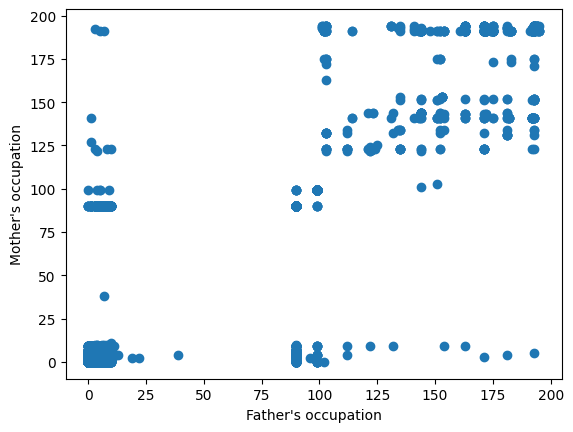

In [55]:
plt.scatter(x=df["Father's occupation"],y =df["Mother's occupation"] )
plt.xlabel("Father's occupation")
plt.ylabel("Mother's occupation")
plt.show()

In [99]:
df["Parent occupation"]= np.where((df["Mother's occupation"]>=df["Father's occupation"]),df["Mother's occupation"],df["Father's occupation"])

## Multi variate analysis (before Manipulation)

- <df['new'] = np.where((df['Column1'] <= df['Column2']) & (
	df['Column1'] <= df['Column3']), df['Column1'], np.nan)>

In [57]:
#plt.figure(figsize=(14,8))
#sns.heatmap(df.drop(['Target'],axis=1).corr(),cmap ='viridis')

In [100]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [59]:
df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0
1,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0
3,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0
4,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76513,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0
76514,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0
76515,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1
76516,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0


<Axes: >

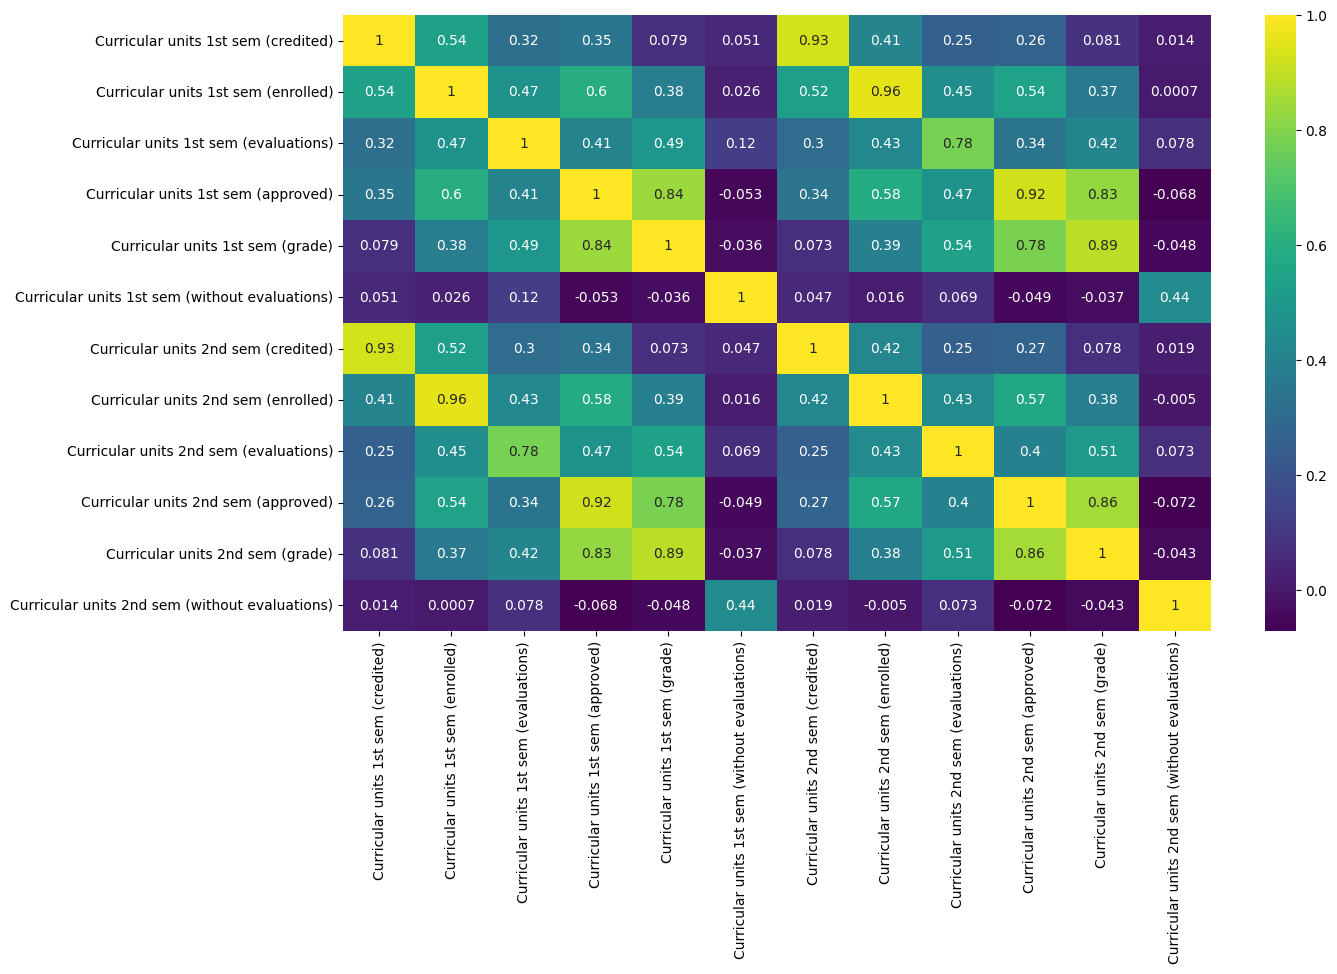

In [101]:
plt.figure(figsize=(14,8))
sns.heatmap(df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']].corr(),cmap ='viridis',annot =True)

In [61]:
df[['Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)']]

,Curricular units 1st sem (approved),Curricular units 1st sem (grade)
0,6,14.500000
1,4,11.600000
2,0,0.000000
3,7,12.591250
4,6,12.933333
...,...,...
76513,6,10.666667
76514,4,13.000000
76515,4,12.500000
76516,0,0.000000


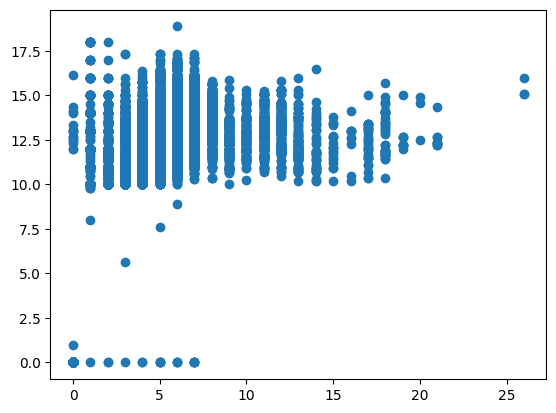

In [62]:
plt.scatter(x=df['Curricular units 1st sem (approved)'],y=df['Curricular units 1st sem (grade)'])

In [63]:
df[['Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)']].value_counts()

Curricular units 1st sem (approved)  Curricular units 1st sem (grade)
0                                    0.000000                            16016
6                                    12.666667                            1685
4                                    12.000000                            1196
6                                    13.000000                            1072
                                     13.500000                             960
                                                                         ...  
7                                    14.585714                               1
                                     14.582222                               1
                                     14.575000                               1
                                     14.571429                               1
26                                   16.000000                               1
Name: count, Length: 2732, dtype: int64

In [64]:
df['Curricular units 1st sem (approved)'].value_counts()

Curricular units 1st sem (approved)
6     22055
0     16033
5     12249
7      7562
4      7015
      ...  
19       10
16       10
21        9
20        3
26        3
Name: count, Length: 23, dtype: int64

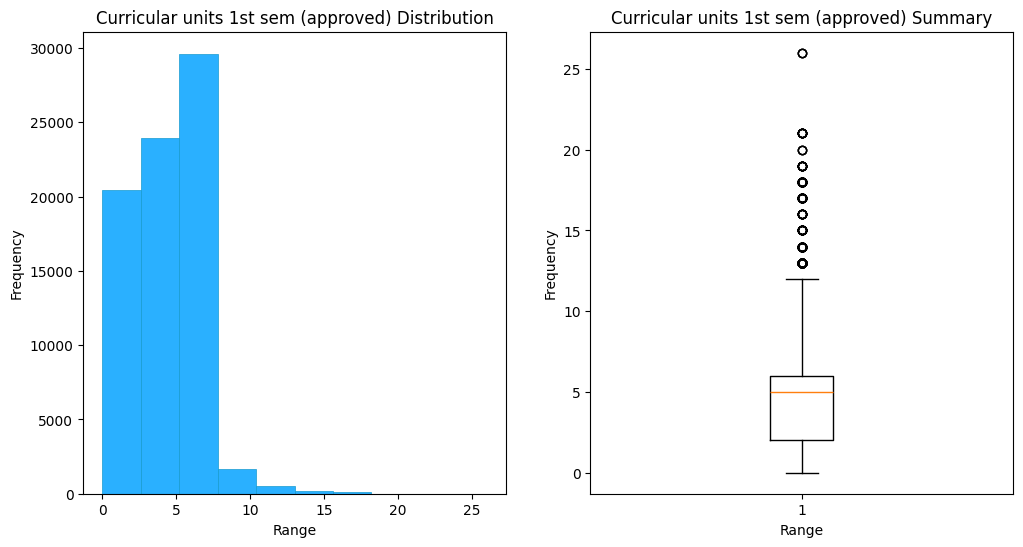

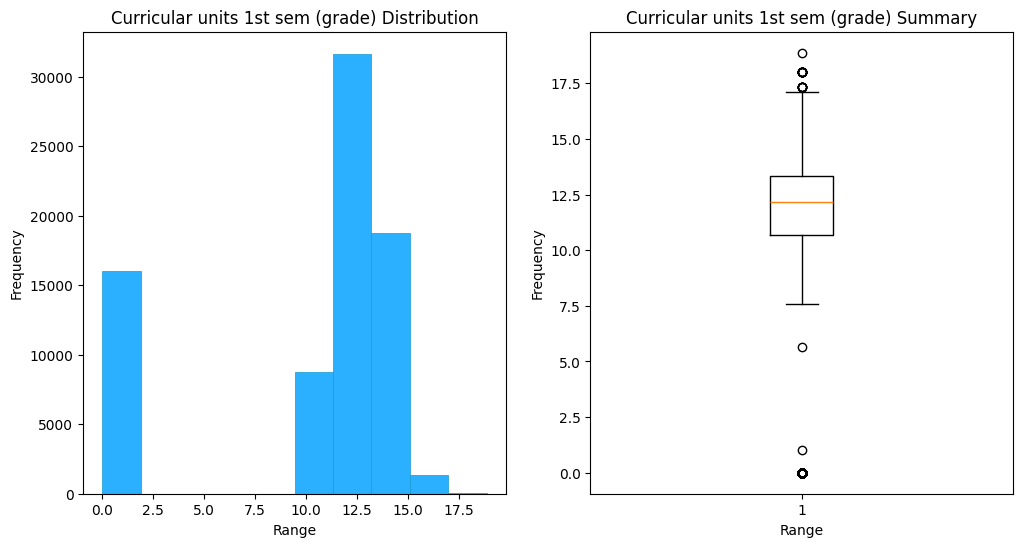

In [65]:
five_point_summary(df[["Curricular units 1st sem (approved)",
       'Curricular units 1st sem (grade)']])

In [66]:
df[['Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (without evaluations)']]

,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (without evaluations)
0,6,6,0
1,6,8,0
2,6,0,0
3,7,9,0
4,7,12,0
...,...,...,...
76513,6,9,0
76514,6,22,0
76515,5,13,2
76516,6,0,0


In [67]:
df[['Curricular units 1st sem (evaluations)','Curricular units 1st sem (without evaluations)']].corr()

,Curricular units 1st sem (evaluations),Curricular units 1st sem (without evaluations)
Curricular units 1st sem (evaluations),1.000000,0.120004
Curricular units 1st sem (without evaluations),0.120004,1.000000


In [68]:
df[['Curricular units 1st sem (evaluations)','Curricular units 1st sem (without evaluations)']].value_counts()

Curricular units 1st sem (evaluations)  Curricular units 1st sem (without evaluations)
8                                       0                                                 15107
6                                       0                                                 12803
7                                       0                                                 12742
0                                       0                                                  7944
9                                       0                                                  5665
                                                                                          ...  
23                                      3                                                     1
11                                      5                                                     1
10                                      7                                                     1
24                                      4        

In [69]:
df[["Debtor","Tuition fees up to date"]].value_counts()

Debtor  Tuition fees up to date
0       1                          66386
        0                           4670
1       0                           3468
        1                           1994
Name: count, dtype: int64

In [70]:
df


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Parent qualification,Parent occupation
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate,19,5
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout,19,9
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout,19,3
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled,19,3
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate,37,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate,19,7
76514,76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate,38,9
76515,76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled,37,10
76516,76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout,38,9


## **Manipulation**

In [102]:
df.drop(["Mother's qualification","Father's qualification","Nacionality","Mother's occupation","Father's occupation"],axis=1,inplace= True)

In [103]:
df.drop(['Curricular units 1st sem (approved)',
         'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)'],axis=1,inplace= True)

####  le_cou train

In [106]:
from sklearn import preprocessing
import pandas as pd
le_cou = preprocessing.LabelEncoder()
df['Course_label'] = le_cou.fit_transform(df['Course'].values)
df["Course_label"].value_counts()

Course_label
15    8140
18    5610
12    5300
11    5042
13    3651
      ... 
0       42
4        1
14       1
2        1
3        1
Name: count, Length: 21, dtype: int64

In [107]:
df['Course_label'] = le_cou.transform(df['Course'].values)              # course eda
df["Course_label"].value_counts()

Course_label
15    8140
18    5610
12    5300
11    5042
13    3651
      ... 
0       42
4        1
14       1
2        1
3        1
Name: count, Length: 21, dtype: int64

In [108]:
le_App = preprocessing.LabelEncoder()
df['Application mode label'] = le_App.fit_transform(df['Application mode'].values)
df["Application mode label"].value_counts()

Application mode label
0     23357
9     11207
14     9585
17     2000
16     1850
4      1011
10      788
15      347
18      296
8       198
19      147
7       119
3        79
5        20
1         3
6         1
12        1
13        1
11        1
2         1
Name: count, dtype: int64

In [109]:
df['Application mode label'] = le_App.transform(df['Application mode'].values)
df["Application mode label"].value_counts()                                                 # appliction eda

Application mode label
0     23357
9     11207
14     9585
17     2000
16     1850
4      1011
10      788
15      347
18      296
8       198
19      147
7       119
3        79
5        20
1         3
6         1
12        1
13        1
11        1
2         1
Name: count, dtype: int64

In [128]:
target_dict ={
    2 : "Graduate",
    1 : "Enrolled",
    0 : "Dropout"
}

In [78]:
le_tar = preprocessing.LabelEncoder()
df['Target_label'] = le_tar.fit_transform(df['Target'].values)
df["Target_label"].value_counts()

Target_label
2    36282
0    25296
1    14940
Name: count, dtype: int64

In [79]:
df['Target_label'] = le_tar.transform(df['Target'].values)
df["Target_label"].value_counts()                                                        #target eda

Target_label
2    36282
0    25296
1    14940
Name: count, dtype: int64

In [80]:
df.drop(['Target'],axis=1,inplace = True)

In [112]:
df.drop(["Course","Application mode"],axis=1,inplace= True)

<Axes: >

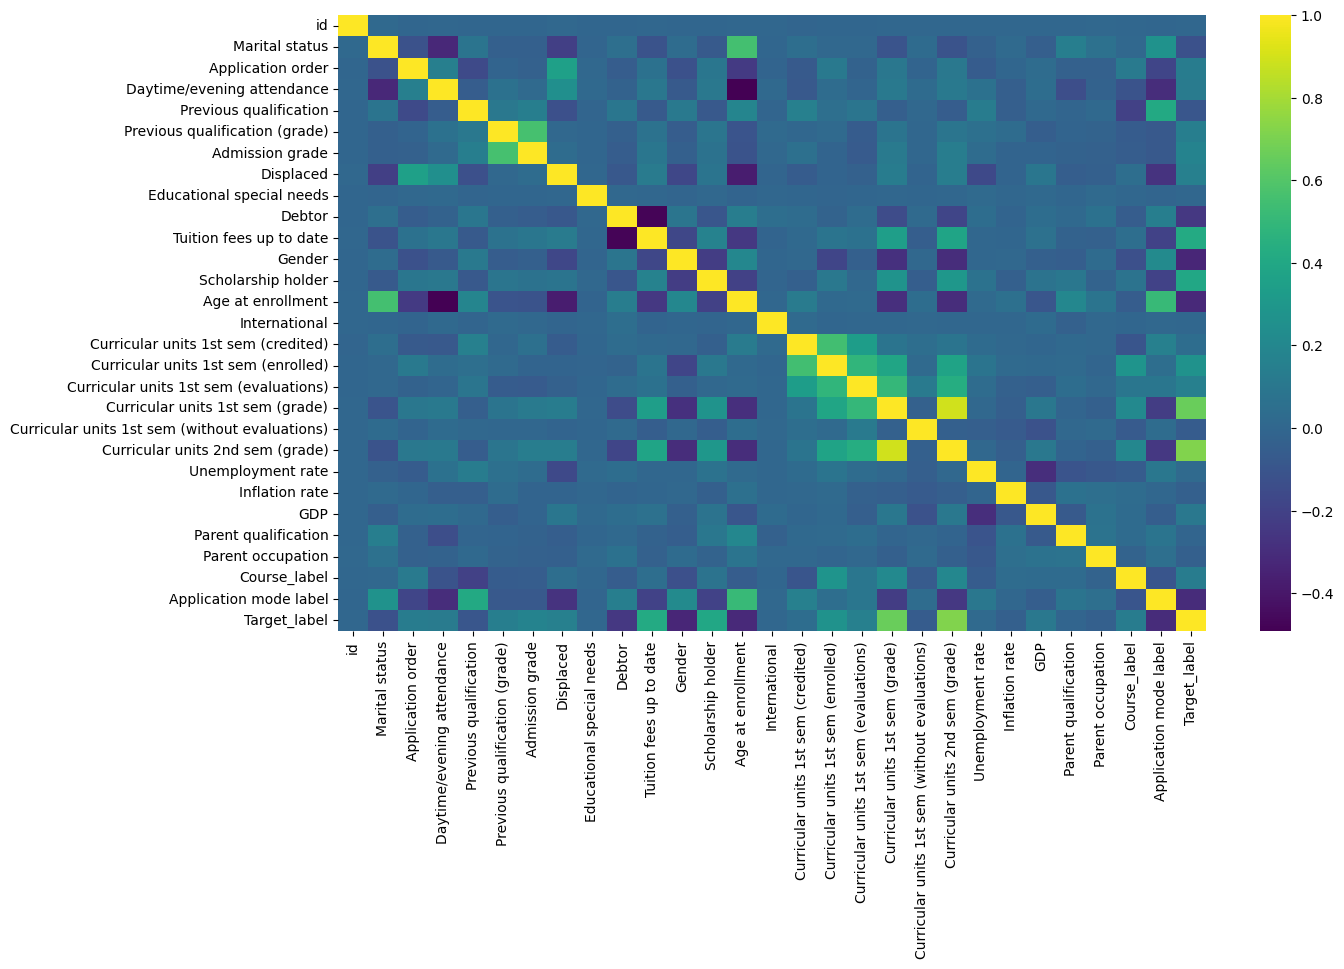

In [82]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap ='viridis')

# Train

In [83]:
from sklearn import tree
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Target_label","id"],axis=1), df["Target_label"], random_state=0, train_size = .75,stratify=df["Target_label"])

In [113]:
X_test = df
X_test


,id,Marital status,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Parent qualification,Parent occupation,Course_label,Application mode label
0,76518,1,1,1,1,141.0,152.1,0,0,0,0,0,0,18,0,0,7,0,0.000000,0,0.000000,13.9,-0.3,0.79,3,3,15,0
1,76519,1,1,1,1,128.0,116.5,0,0,0,1,0,0,19,0,0,6,7,14.857143,0,13.500000,11.1,0.6,2.02,19,5,12,0
2,76520,1,1,1,1,118.0,114.2,0,0,0,1,0,1,18,0,0,6,11,12.000000,0,11.000000,15.5,2.8,-4.06,19,9,12,0
3,76521,1,1,1,39,130.0,130.0,0,0,0,1,0,1,23,0,2,6,15,11.500000,0,11.000000,8.9,1.4,3.51,19,3,11,17
4,76522,1,1,1,1,110.0,106.0,1,0,0,1,0,0,26,0,0,6,9,11.000000,0,10.666667,7.6,2.6,0.32,37,5,17,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,2,1,1,128.0,124.7,1,0,0,1,0,0,19,0,0,0,0,0.000000,0,0.000000,15.5,2.8,-4.06,38,10,1,0
51008,127526,2,1,1,19,133.1,140.0,0,0,1,0,1,0,33,0,0,5,6,0.000000,0,0.000000,9.4,-0.8,-3.12,37,9,9,14
51009,127527,1,1,1,1,127.0,120.4,0,0,1,0,0,0,20,0,0,0,0,0.000000,0,0.000000,15.5,2.8,-4.06,1,10,1,0
51010,127528,1,3,1,1,132.0,126.3,1,0,1,0,0,0,18,0,0,6,8,12.600000,0,13.000000,7.6,2.6,0.32,19,5,18,0


In [86]:
df.drop(["Target_label","id"],axis=1)

,Marital status,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Parent qualification,Parent occupation,Course_label,Application mode label
0,1,1,1,1,126.0,122.6,0,0,0,1,0,1,18,0,0,6,6,14.500000,0,12.428571,11.1,0.6,2.02,19,5,11,0
1,1,1,1,1,125.0,119.8,1,0,0,1,0,0,18,0,0,6,8,11.600000,0,0.000000,11.1,0.6,2.02,19,9,11,11
2,1,2,1,1,137.0,144.7,0,0,0,1,1,0,18,0,0,6,0,0.000000,0,0.000000,16.2,0.3,-0.92,19,3,12,11
3,1,3,1,1,131.0,126.1,1,0,0,1,0,1,18,0,0,7,9,12.591250,0,12.820000,11.1,0.6,2.02,19,3,13,0
4,1,2,1,1,132.0,120.1,1,0,0,1,0,0,18,0,0,7,12,12.933333,0,12.933333,7.6,2.6,0.32,37,9,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,1,1,1,121.0,116.5,1,0,0,1,0,1,18,0,0,6,9,10.666667,0,10.600000,13.9,-0.3,0.79,19,7,12,11
76514,1,6,1,1,125.0,131.6,1,0,0,1,0,0,19,0,0,6,22,13.000000,0,13.875000,9.4,-0.8,-3.12,38,9,12,0
76515,5,1,1,1,138.0,123.3,1,0,0,1,0,0,19,0,0,5,13,12.500000,2,11.400000,9.4,-0.8,-3.12,37,10,7,11
76516,1,3,1,1,136.0,124.8,1,0,0,1,0,0,18,0,0,6,0,0.000000,0,0.000000,7.6,2.6,0.32,38,9,6,0


In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [255]:

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeClassifier
reg = DecisionTreeClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.7840313246932208


In [256]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy}')

Accuracy on test set: 0.7903815995818086


In [260]:
score =accuracy_score(y_test, y_pred)
print(score)

0.7903815995818086


In [259]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4953,  839,  532],
       [ 366, 2113, 1256],
       [ 189,  828, 8054]], dtype=int64)

Text(47.25, 0.5, 'Truth')

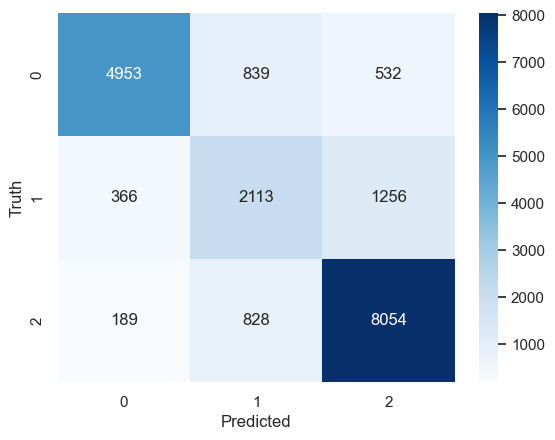

In [261]:
sns.heatmap(cm,annot=True,fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      6324
           1       0.56      0.57      0.56      3735
           2       0.82      0.89      0.85      9071

    accuracy                           0.79     19130
   macro avg       0.76      0.75      0.75     19130
weighted avg       0.79      0.79      0.79     19130



# gradient boost

In [144]:
!pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 281.8 kB/s eta 0:05:54
   ---------------------------------------- 0.1/99.8 MB 602.4 kB/s eta 0:02:46
   ---------------------------------------- 0.2/99.8 MB 1.0 MB/s eta 0:01:39
   ---------------------------------------- 0.5/99.8 MB 1.7 MB/s eta 0:01:00
   ---------------------------------------- 0.7/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 1.1/99.8 MB 2.9 MB/s eta 0:00:35
    --------------------------------------- 1.3/99.8 MB 3.1 MB/s eta 0:00:32
    --------------------------------------- 1.3/99.8 MB 3.1 MB/s eta 0:00:32
    --------------------------------------- 1.3/99.8 MB 3.1 MB/s eta 0:00:32
    -

In [145]:
from sklearn.ensemble import GradientBoostingClassifier 

In [264]:
import optuna
from optuna.samplers import TPESampler
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import joblib
from xgboost import XGBClassifier
import numpy as np

# Sample data preparation (replace this with your actual data)
# data = ...  # Load your data here
# Assuming you have a DataFrame `df` with features and target


# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 2.0),
        'max_delta_step': trial.suggest_float('max_delta_step', 0, 10),
        'random_state': 0,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'early_stopping_rounds': 10
    }

    # Initialize StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Initialize the XGBClassifier
    xgb = XGBClassifier(**param)

    # Perform cross-validation
    scores = []
    for train_idx, valid_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        xgb.fit(X_tr, y_tr,
                eval_set=[(X_val, y_val)],
                verbose=False)

        preds = xgb.predict(X_val)
        score = accuracy_score(y_val, preds)
        scores.append(score)

    return np.mean(scores)

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=20, n_jobs=-1)

# Get the best parameters and best score
best_params = study.best_params
best_score = study.best_value

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Train the best model on the full training data
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model.fit(X_train, y_train)



[I 2024-06-06 08:35:33,040] A new study created in memory with name: no-name-acaa04d6-9333-4fe6-ad7f-bea7049b09da
[I 2024-06-06 08:36:30,258] Trial 4 finished with value: 0.8027636141545271 and parameters: {'n_estimators': 612, 'learning_rate': 0.26384789727193736, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8127446475945965, 'colsample_bytree': 0.9619472808659301, 'gamma': 0.16037383832080593, 'reg_alpha': 0.7433918736607623, 'reg_lambda': 0.7751206017773203, 'scale_pos_weight': 1.2805026918207978, 'max_delta_step': 1.4092391721894293}. Best is trial 4 with value: 0.8027636141545271.
[I 2024-06-06 08:36:32,264] Trial 0 finished with value: 0.8033212238396809 and parameters: {'n_estimators': 550, 'learning_rate': 0.2666857973839457, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.9899922348606356, 'colsample_bytree': 0.8669654320351878, 'gamma': 0.036588270406262946, 'reg_alpha': 0.985807837737693, 'reg_lambda': 0.09715455647330973, 'scale_pos_weight': 1.21211768365312

Best Parameters: {'n_estimators': 977, 'learning_rate': 0.10857616728787503, 'max_depth': 6, 'min_child_weight': 7, 'subsample': 0.7574950872641307, 'colsample_bytree': 0.6711855038161302, 'gamma': 0.22309731520392012, 'reg_alpha': 0.8409157237562934, 'reg_lambda': 0.5521790441119048, 'scale_pos_weight': 1.7518726075114166, 'max_delta_step': 8.41783022867418}
Best Score: 0.8074161748043615


c:\Users\vevek\OneDrive\Desktop\Python\Kaggle_comp_Academic_success\.conda\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:50:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6711855038161302, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.22309731520392012, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.10857616728787503,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=8.41783022867418, max_depth=6, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=977, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [266]:

# Predict on the test set
y_pred1 = best_model.predict(X_test)


In [119]:
csv= df[['id']].copy()
csv


,id
0,76518
1,76519
2,76520
3,76521
4,76522
...,...
51007,127525
51008,127526
51009,127527
51010,127528


In [122]:
import joblib

In [123]:
load_xgb= joblib.load("best_xgb_model.pkl")

In [125]:
csv['Target']= load_xgb.predict(X_test.drop(["Parent qualification", "id", "Parent occupation"],axis =1))

In [126]:
csv


,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,0
...,...,...
51007,127525,0
51008,127526,0
51009,127527,0
51010,127528,0


In [129]:
target_dict

{2: 'Graduate', 1: 'Enrolled', 0: 'Dropout'}

In [131]:
csv['Target']=csv['Target'].map(target_dict)

In [134]:
csv.to_csv("submission_xgb_no_par.csv",index=False)

In [267]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy on test set: {accuracy}')

# Save the model to a file
joblib.dump(best_model, 'best_xgb_model.pkl')
print("Model saved as best_xgb_model.pkl")

Accuracy on test set: 0.8022477783585991
Model saved as best_xgb_model.pkl


In [268]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                                           Feature  Importance
9                          Tuition fees up to date    0.311795
11                              Scholarship holder    0.092632
19                Curricular units 2nd sem (grade)    0.083588
17                Curricular units 1st sem (grade)    0.063208
16          Curricular units 1st sem (evaluations)    0.047051
..                                             ...         ...
21                                  Inflation rate    0.014563
18  Curricular units 1st sem (without evaluations)    0.014487
0                                   Marital status    0.013916
13                                   International    0.012587
7                        Educational special needs    0.011619

[25 rows x 2 columns]


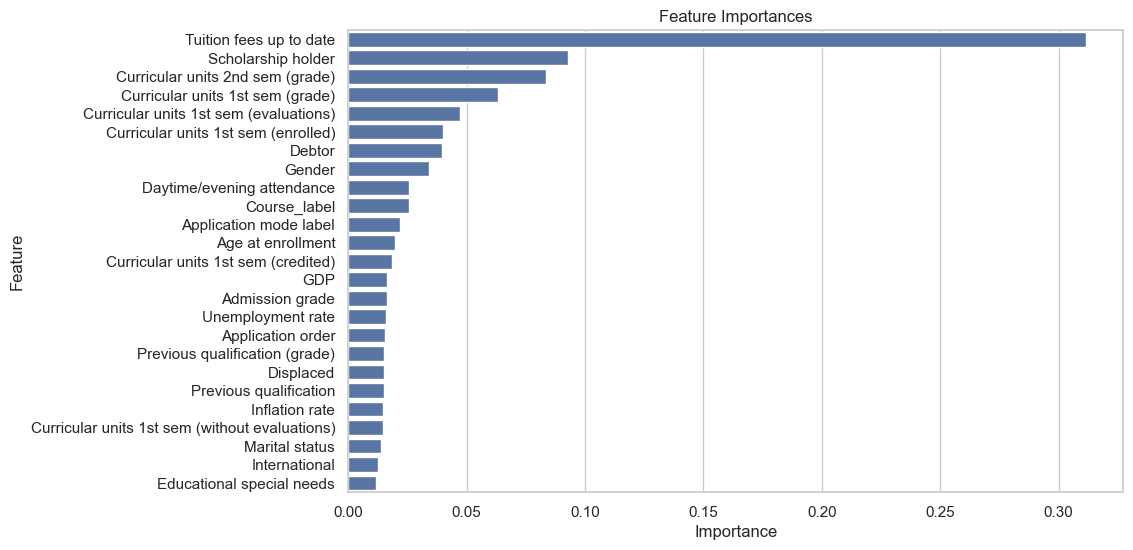

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [270]:
feature_importance_df

,Feature,Importance
9,Tuition fees up to date,0.311795
11,Scholarship holder,0.092632
19,Curricular units 2nd sem (grade),0.083588
17,Curricular units 1st sem (grade),0.063208
16,Curricular units 1st sem (evaluations),0.047051
...,...,...
21,Inflation rate,0.014563
18,Curricular units 1st sem (without evaluations),0.014487
0,Marital status,0.013916
13,International,0.012587


In [276]:
cm1 = confusion_matrix(y_test,y_pred1)

cm1

array([[5122,  713,  489],
       [ 490, 2067, 1178],
       [ 228,  685, 8158]], dtype=int64)

Text(47.25, 0.5, 'Truth')

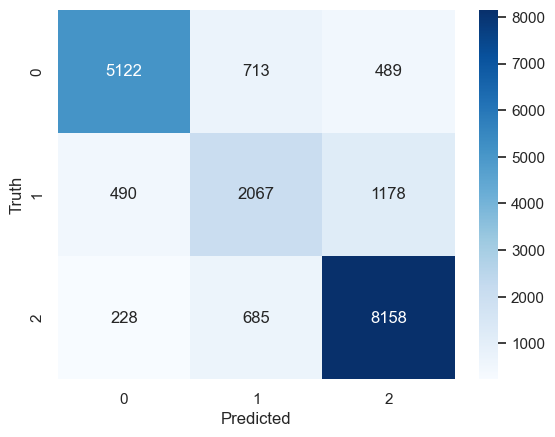

In [277]:
sns.heatmap(cm1,annot=True,fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [275]:
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.88      0.81      0.84      6324
           1       0.60      0.55      0.57      3735
           2       0.83      0.90      0.86      9071

    accuracy                           0.80     19130
   macro avg       0.77      0.75      0.76     19130
weighted avg       0.80      0.80      0.80     19130



# Random Forest Classifier

In [88]:
import optuna
from optuna.samplers import TPESampler
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming you have a DataFrame `df` with features and target
# Replace this with your actual data
# df = ...



# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_float('max_features', 0.5, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 0
    }

    # Initialize StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Initialize the RandomForestClassifier
    rf = RandomForestClassifier(**param)

    # Perform cross-validation
    scores = []
    for train_idx, valid_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        rf.fit(X_tr, y_tr)
        preds = rf.predict(X_val)
        score = accuracy_score(y_val, preds)
        scores.append(score)

    return np.mean(scores)

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=20, n_jobs=-1)

# Get the best parameters and best score
best_params = study.best_params
best_score = study.best_value

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Train the best model on the full training data
best_model_ran = RandomForestClassifier(**best_params, random_state=0)
best_model_ran.fit(X_train, y_train)

# Predict on the test set
y_pred2 = best_model_ran.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy on test set: {accuracy}')


[I 2024-06-06 09:24:14,666] A new study created in memory with name: no-name-f8f5975a-410f-4c1d-b969-9a04e665008c
[I 2024-06-06 09:28:22,011] Trial 6 finished with value: 0.7891545236582547 and parameters: {'n_estimators': 227, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.5642984350743917, 'bootstrap': True}. Best is trial 6 with value: 0.7891545236582547.
[I 2024-06-06 09:35:21,441] Trial 0 finished with value: 0.7506097947844597 and parameters: {'n_estimators': 748, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.9990667572402797, 'bootstrap': True}. Best is trial 6 with value: 0.7891545236582547.
[I 2024-06-06 09:36:15,459] Trial 1 finished with value: 0.7927266762590994 and parameters: {'n_estimators': 209, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 0.8199591945451676, 'bootstrap': False}. Best is trial 1 with value: 0.7927266762590994.
[I 2024-06-06 09:37:33,194] Trial 2 finis

Best Parameters: {'n_estimators': 408, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.516502558516175, 'bootstrap': True}
Best Score: 0.7985815749167677
Accuracy on test set: 0.8004704652378463


# test csv


In [ ]:
test_df = pd.read_csv("/content/test.csv")

In [154]:
import joblib
joblib.dump(grid_search.best_estimator_, 'best_model_offline.pkl')

['best_model_offline.pkl']